Announcements:
- HW5 due today (ask/read questions on campuswire)
- No quiz this week. one ML quiz next week and one more by the TAs that focuses on first half of the class.

Wednesday: regression, overfitting, generalization, train/validation/test data, cross validation

Today: supervised vs unsupervised learning, clustering

Images from Natalie Lao: https://www.youtube.com/watch?v=wy-m6sd1BOA

![title](s1.jpg)

![title](s2.jpg)

![title](s3.jpg)

![title](s5.jpg)

turning categorical feature values into something numerical/binary

one of my features is race, 5 types of race = " ", " "
turn this one column into 5 columns -> race1, race2, ... race5

![title](s6.jpg)

Q: why would we ever use unsupervised learning?

- "unsupervised takes less time for larger datasets because we don’t have to go through and add all the labels?"

- "Unsupervised learning encourages autonomy"

- "Finding patterns and groups in data. Like when we made a penguin scatter plot and we saw the clusters corresponding to different species."

other types of ML: semi-supervised learning, reinforcement learning


![title](s7.jpg)

![title](s8.jpg)

![title](s4.jpg)

![title](s10.jpg)

clustering algorithms
https://scikit-learn.org/stable/modules/clustering.html

kmeans
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [12]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std= 0.6)

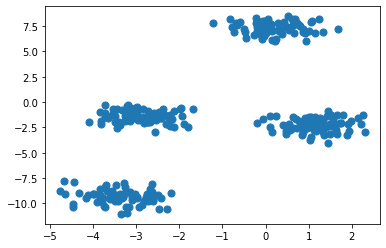

In [13]:
fig, ax = plt.subplots(1)
ax.scatter(X[:, 0], X[:, 1], s=50)

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X) # in supervised learning examples, we called model.fit(X, y)

# kmeans tries to find 4 centroids
# reassigns points to the clusters with the closest centroid
# repeat

KMeans(n_clusters=4)

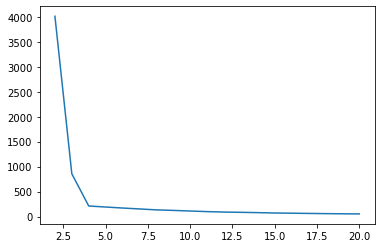

In [15]:
scores = []
ns = range(2, 21)
for n in ns:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    scores.append(kmeans.inertia_) # how "compact" are the clusters on average? 

plt.plot(ns, scores)
# higher value means "worse" in a sense

# heuristic called "elbow method" 
# looks for a point at the start of diminishing returns

In [16]:
y_kmeans = kmeans.predict(X) 
#y_kmeans

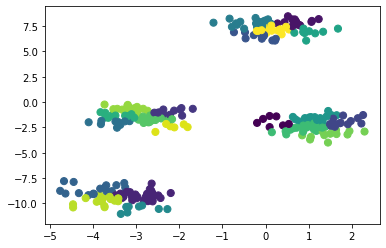

In [17]:
fig, ax = plt.subplots(1)
ax.scatter(X[:, 0], X[:, 1], s=50, c=y_kmeans, cmap='viridis')

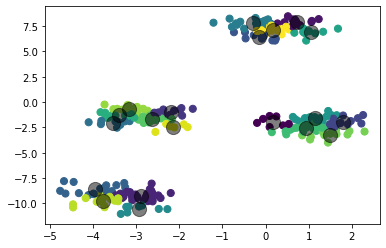

In [18]:
centers = kmeans.cluster_centers_
ax.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
fig

In [19]:
penguins = pd.read_csv("palmer_penguins.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'palmer_penguins.csv'

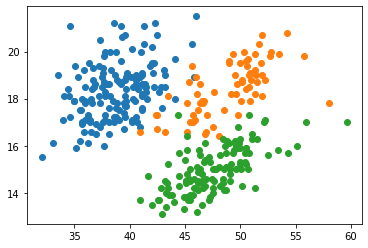

In [ ]:
fig, ax = plt.subplots(1)

for s in penguins['Species'].unique():
    mask = (penguins['Species']==s)
    df = penguins[mask]
    ax.scatter(df['Culmen Length (mm)'], df['Culmen Depth (mm)'], label=s)

In [ ]:
X = penguins[['Culmen Length (mm)', 'Culmen Depth (mm)']].dropna()

In [ ]:
kmeans = KMeans(n_clusters=30)
kmeans.fit(X)

KMeans(n_clusters=30)

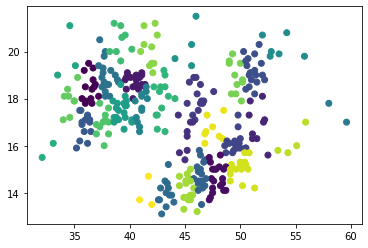

In [ ]:
y_kmeans= kmeans.predict(X)

fig, ax = plt.subplots(1)
ax.scatter(X['Culmen Length (mm)'], X['Culmen Depth (mm)'], c=y_kmeans)

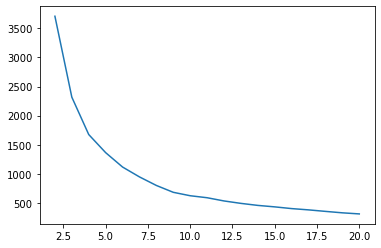

In [ ]:
scores = []
ns = range(2, 21)
for n in ns:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    scores.append(kmeans.inertia_) 
# how "compact" are the clusters on average? 
# this measures
# how close are points in cluster A to centroid A, on average?

plt.plot(ns, scores)

# elbow is not as pointy because this is real data and the "true number of clusters" is not clear